# **Rock vs Mine Prediction** :

In this Submarin will send the sonar sound inside the see water and will detect that whether it is Rock or Mine.

## Importing Importing Libraries 


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# load dataset using pandas datafream
df = pd.read_csv('/content/drive/MyDrive/machinelearning/Sonar_rock_vs_mine_prediction/sonar data.csv', header = None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
# shape of df
df.shape

(208, 61)

In [7]:
# description of df
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
# checking the data of Mine n Rock 
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

M -> Mine

**R -> Rock**

In [13]:
# Checking the mean of the target column
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## Spliting the Data in to Independent and Dependent Variable

In [15]:
# Here, in the x we have droping the target column and storing other all column
X = df.drop(columns = 60, axis = 1)
# here, in this we are storin the last target column 
y = df[60]

In [16]:
X.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64')

In [17]:
X.shape

(208, 60)

In [18]:
y.shape

(208,)

# Spliting the data into Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [21]:
print('X_train Shape', X_train.shape)
print('X_test Shape', X_test.shape)

X_train Shape (166, 60)
X_test Shape (42, 60)


# Model Training

Logistic Regression

In [23]:
model = LogisticRegression()

# training LogisticRegression moodel with training data
model.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [24]:
# training data accuracy
X_train_acc = model.predict(X_train)
train_accuracy = accuracy_score(X_train_acc, y_train)

In [25]:
print('Training Data Accuracy : ', train_accuracy)

Training Data Accuracy :  0.8373493975903614


In [26]:
# testing data accuracy
X_test_acc = model.predict(X_test)
test_accuracy = accuracy_score(X_test_acc, y_test)

In [28]:
print('Testing Data Accuracy : ', test_accuracy)

Testing Data Accuracy :  0.8571428571428571


# Creating Predictive System for Identifying that it is Rock or Mine

In [30]:
input_data = (0.0519,	0.0548,	0.0842,	0.0319,	0.1158,	0.0922,	0.1027,	0.0613,	0.1465,	0.2838,	0.2802,	0.3086,	0.2657,	0.3801,	0.5626,	0.4376,	0.2617,	0.1199,	0.6676,	0.9402,	0.7832,	0.5352,	0.6809,	0.9174,	0.7613,	0.8220,	0.8872,	0.6091,	0.2967,	0.1103,	0.1318,	0.0624,	0.0990,	0.4006,	0.3666,	0.1050,	0.1915,	0.3930,	0.4288,	0.2546,	0.1151,	0.2196,	0.1879,	0.1437,	0.2146,	0.2360,	0.1125,	0.0254,	0.0285,	0.0178,	0.0052,	0.0081,	0.0120,	0.0045,	0.0121,	0.0097,	0.0085,	0.0047,	0.0048,	0.0053)

# changing the input into numpy array
input_data_np = np.asarray(input_data)

# reshpape 
input_reshape = input_data_np.reshape(1, -1)

prediction = model.predict(input_reshape)
print('Prediction : ', prediction)

# we have defined 0 because it represent the first element of the list
if (prediction[0] == 'R'):
  print('The object is Rock.')
else:
  print('The object is Mine.')

Prediction :  ['M']
The object is Mine.


# Saving the Model

In [31]:
import pickle

In [32]:
pickle.dump(model, open('model.pkl', 'wb'))

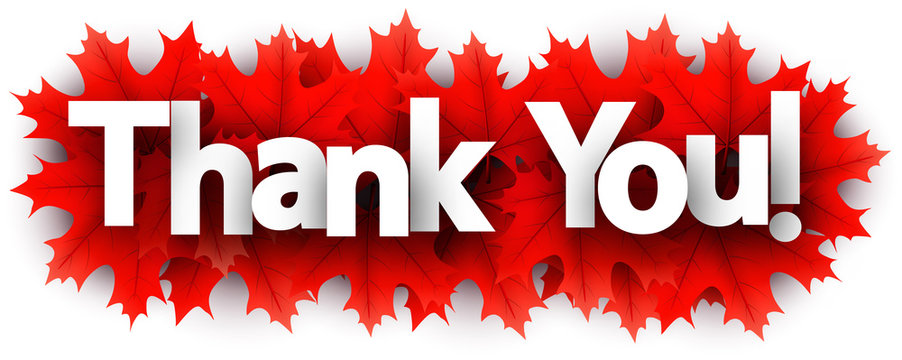